# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

## **Importing the Libraries**

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

# Importing Deep Learning Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import backend
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras.applications as app


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [17]:
# Storing the path of the data file from the Google drive
file = 'Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
#with zipfile.ZipFile(file, 'r') as zip_ref:
#    zip_ref.extractall()

In [18]:
picture_size = 48
folder_path = "/home/josecxz/QuantumSpace/Projects/Data_Science_Course/Capstone Project/Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:**
- Face images are characterized by a smiling mouth showing teeth.
- Rising cheeks uplifting face appearance
- bright open eyes also the eyes may appear wider

In [19]:
print(os.listdir(folder_path + "train/" + "happy")[1])

18526.jpg


###

Number of images in 'happy' folder: 3976


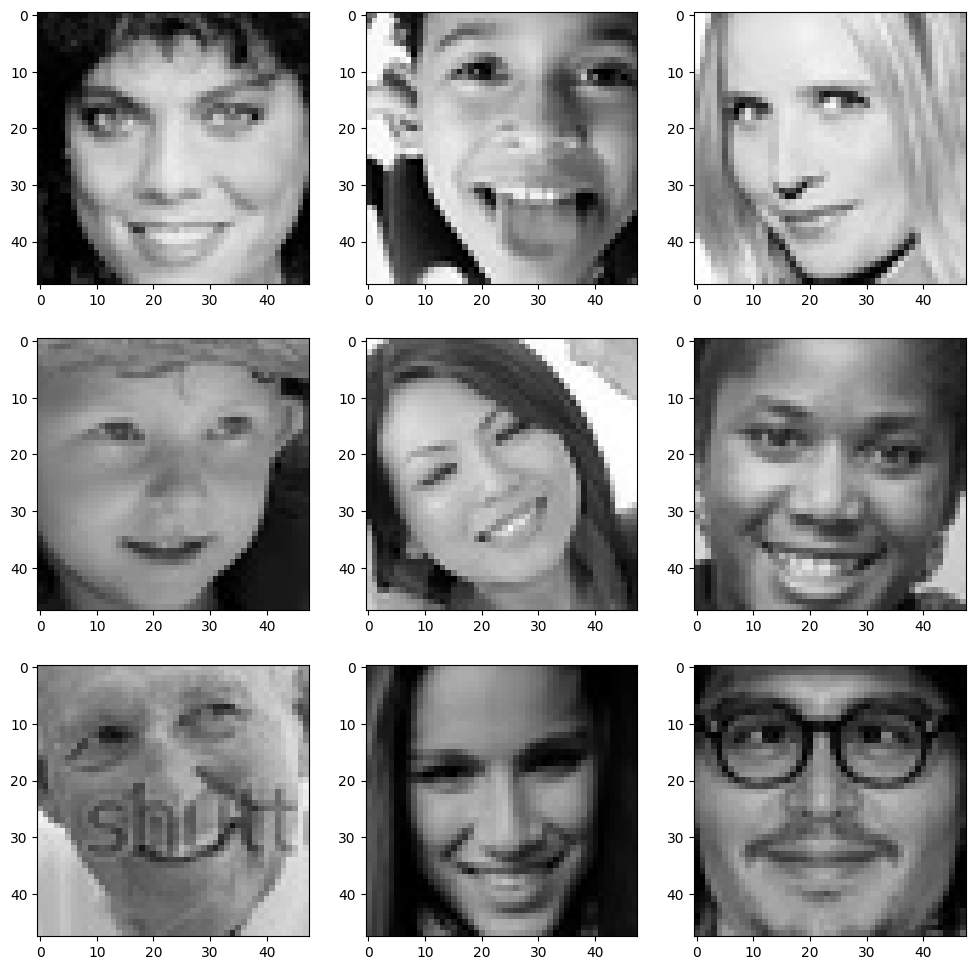

In [20]:
emotion_type = 'happy'
img_folder = os.path.join(folder_path, "train", emotion_type)
img_list = os.listdir(img_folder)
img_list = [f for f in os.listdir(img_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
img_list1 = os.listdir(img_folder)
count = len(img_list1)
print(f"Number of images in '{emotion_type}' folder: {count}")

plt.figure(figsize=(12, 12))
for i in range(0, 9):  # Avoid IndexError if less than 9 images
    img_path = os.path.join(img_folder, img_list[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    #plt.axis('off')

plt.show()

### **Sad**

In [21]:
range(1, 15, 1)

range(1, 15)

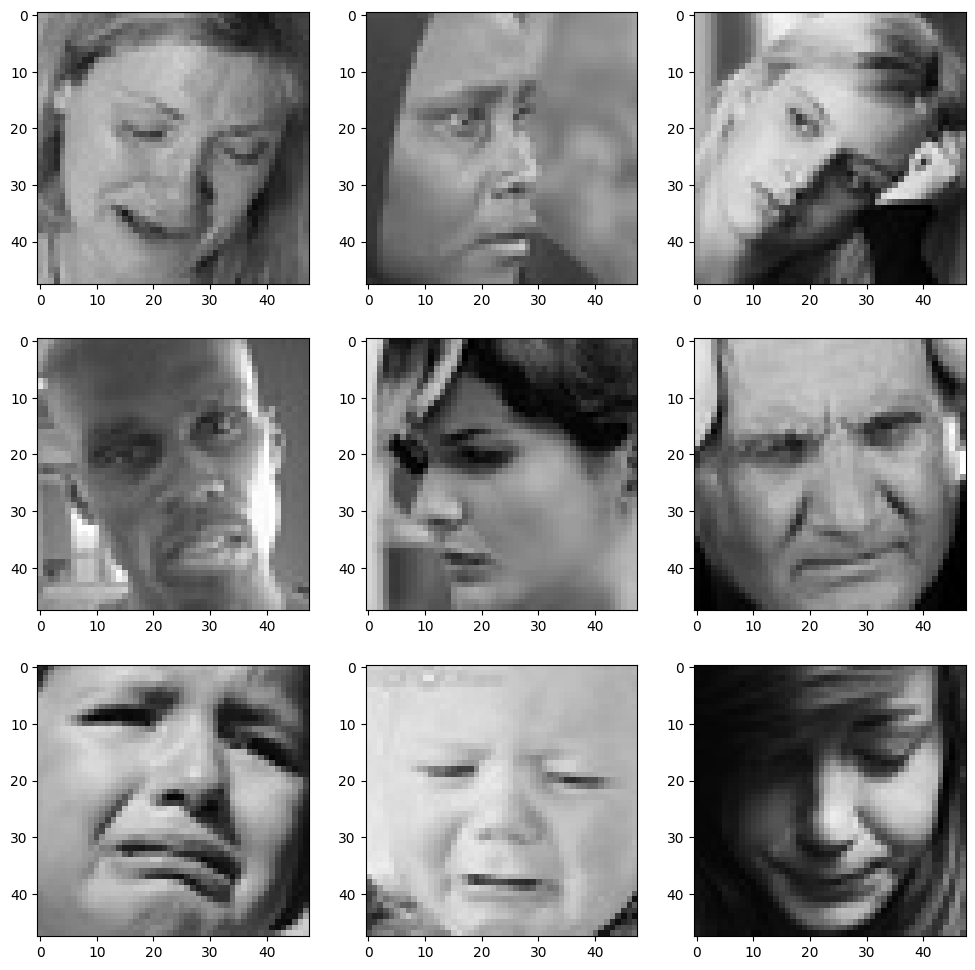

In [22]:
emotion_type = 'sad'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Sad faces can be distinguished by a downturned mouth forming a frown or a straight line.
- The eyes are usually closed, or staring at the downside or upside of the image.


### **Neutral**

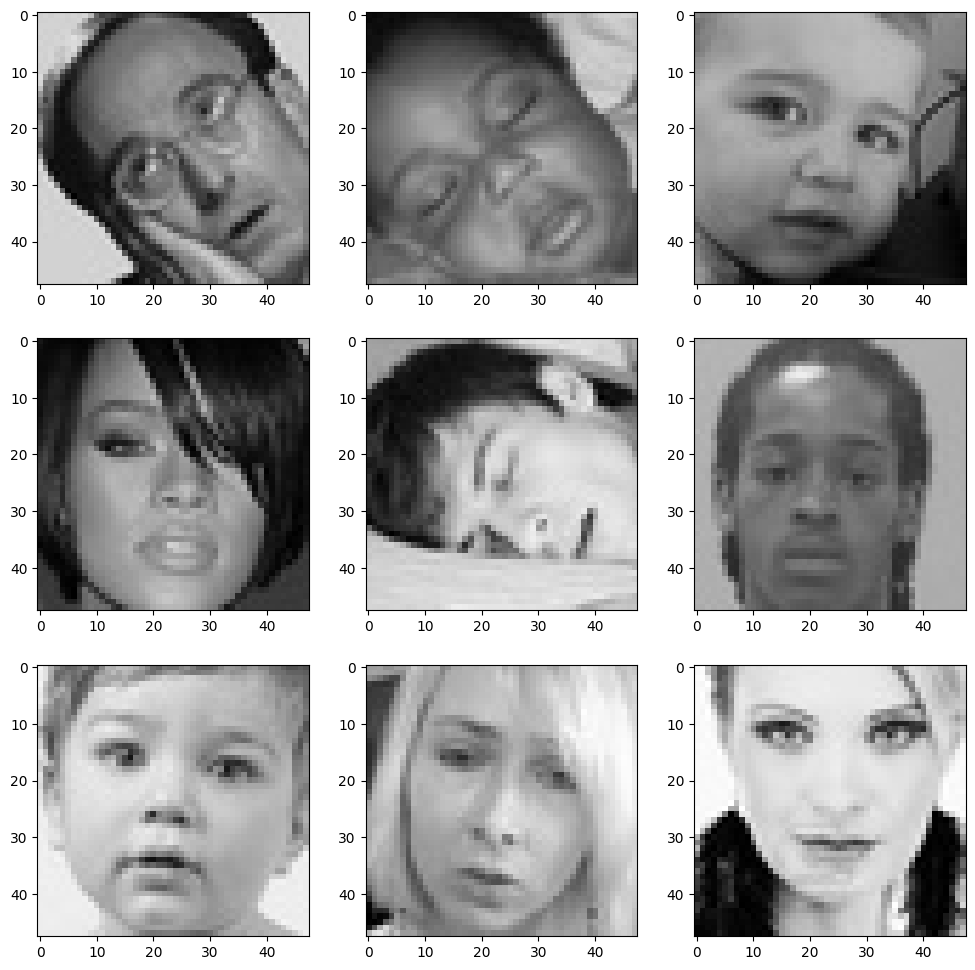

In [23]:
emotion_type = 'neutral'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- A lack of strong emotion or expression characterizes faces.
- The mouth is relaxed and presents a moderate form, neither upturned in a smile nor downturned in a frown.
- The eyes are open, and a typical gaze can be seen at some point in the image.

### **Surprised**

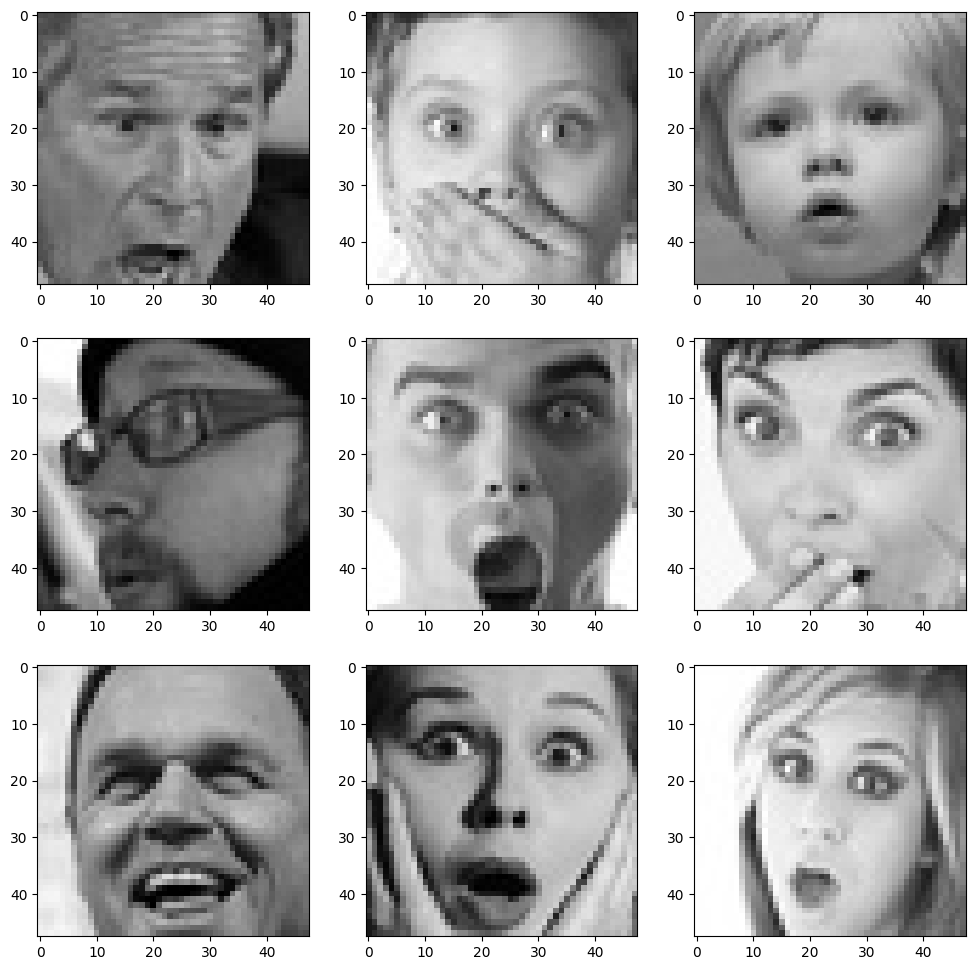

In [24]:
emotion_type = 'surprise'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" +
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- The emotion can be characterized by a big open mouth, sometimes forming an "O" shape.
- Wide-open eyes where the eyebrows are raised.
- Hands touching the cheek of the face or covering the mouth.

## **Checking Distribution of Classes**

In [25]:
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'Happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'Sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'Neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'Surprise':   ", num_surprise)

Number of images in the class 'Happy':    3976
Number of images in the class 'Sad':    3982
Number of images in the class 'Neutral':    3978
Number of images in the class 'Surprise':    3173


Text(0, 0.5, 'Values')

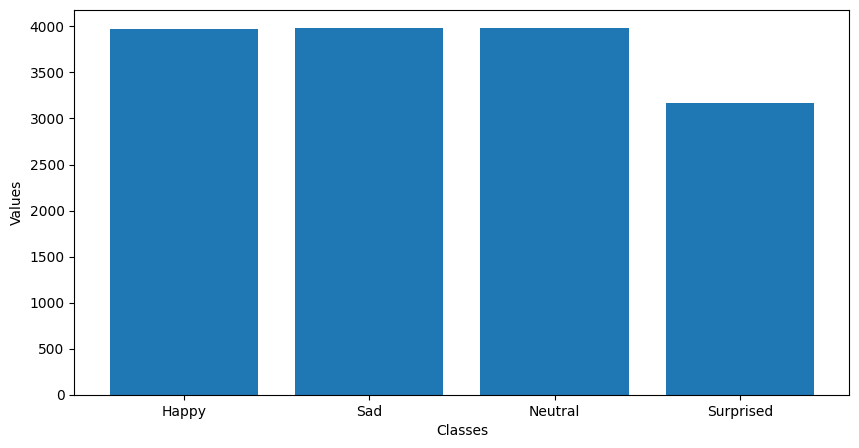

In [26]:
plt.figure(figsize = (10, 5))
plt.bar(['Happy', 'Sad','Neutral', 'Surprised'], [num_happy,num_sad,num_neutral,num_surprise], align = 'center')
plt.xlabel('Classes')
plt.ylabel('Values')

**Observations and Insights:**
On the bar plot, we can see the distribution and the total number of images per class, where we have 3976 images for happy emotion, 3982 images for sad emotion, 3978 images for neutral, and 3173 images for surprised emotion. The classes are equally distributed, except for Suprise emotion, which has fewer images, around 800 hundred photos less than the other classes.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [27]:
batch_size  = 32
desc_classes = ['Happy', 'Sad', 'Neutral', 'Surprise'],
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [28]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [29]:
def ann_model():
    model = Sequential()
    model.add(Flatten(input_shape = (48, 48, 1)))
    #First Layer
    model.add(Dense(256, activation = 'relu'))
    #Second Layer
    model.add(Dense(128, activation = 'relu'))
    #Third Layer
    model.add(Dense(64, activation = 'relu'))
    #Fourth Layer
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])

    return model

In [30]:
model_1_ANN = ann_model()
model_1_ANN.summary()

/home/josecxz/QuantumSpace/tensor-cpu/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1767008584.838251   28239 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5518 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,444 (2.42 MB)

 Trainable params: 633,444 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model_1_ANN.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20


2025-12-29 12:43:07.262454: I external/local_xla/xla/service/service.cc:163] XLA service 0x7b80fc005880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-29 12:43:07.262519: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-12-29 12:43:07.317344: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-29 12:43:07.521233: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90300
2025-12-29 12:43:07.571950: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:43:07.

  7/473 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.1738 - loss: 154.7292

I0000 00:00:1767008591.894799   29436 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


373/473 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2776 - loss: 31.0348

2025-12-29 12:43:17.624372: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_242', 8 bytes spill stores, 8 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2853 - loss: 27.1438

2025-12-29 12:43:23.113098: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:43:23.113145: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:43:23.939243: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_85', 304 bytes spill stores, 304 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.3166 - loss: 11.5867 - val_accuracy: 0.3327 - val_loss: 1.9445
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3622 - loss: 1.8740 - val_accuracy: 0.3428 - val_loss: 1.5961
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4046 - loss: 1.4095 - val_accuracy: 0.3609 - val_loss: 1.4444
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4163 - loss: 1.3389 - val_accuracy: 0.4649 - val_loss: 1.2167
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4280 - loss: 1.2718 - val_accuracy: 0.4878 - val_loss: 1.2360
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4145 - loss: 1.3679 - val_accuracy: 0.4545 - val_loss: 1.2137
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4018 - loss: 1.3218 - val_accuracy: 0.4786 - val_loss: 1.2041
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4311 - loss: 1.2504 - val_accuracy: 0.4943 - v

In [32]:
test_images, test_labels = next(test_set)
accuracy = model_1_ANN.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 32ms/step - accuracy: 0.3438 - loss: 1.2449


**Observations and Insights:**
The model is an Arifitial Neural Network (ANN) model that has four layers and has an accuracy of ~43% on the test data. We can see that the accuaracy on the trainig data does not increase over the epoch iteration.

In [33]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [34]:
def cnn_model_1():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional Block
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))

    model.add(Flatten())

    # Fully Connected Block
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])

    return model

In [35]:
model_1_CNN = cnn_model_1()
model_1_CNN.summary()

/home/josecxz/QuantumSpace/tensor-cpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594,788 (2.27 MB)

 Trainable params: 594,788 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

In [36]:
history1 = model_1_CNN.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
189/473 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3339 - loss: 30.3288

2025-12-29 12:44:12.948936: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_287', 8 bytes spill stores, 8 bytes spill loads

2025-12-29 12:44:12.982563: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_287', 12 bytes spill stores, 12 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4484 - loss: 4.1848 - val_accuracy: 0.5124 - val_loss: 1.1949
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5846 - loss: 1.0136 - val_accuracy: 0.5949 - val_loss: 1.0061
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6429 - loss: 0.8758 - val_accuracy: 0.5509 - val_loss: 1.1410
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6963 - loss: 0.7716 - val_accuracy: 0.5576 - val_loss: 1.1259
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7190 - loss: 0.7006 - val_accuracy: 0.5823 - val_loss: 1.1036
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7570 - loss: 0.6228 - val_accuracy: 0.5994 - val_loss: 1.1456
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7829 - loss: 0.5546 - val_accuracy: 0.6020 - val_loss: 1.2442
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8162 - loss: 0.4833 - val_accuracy: 0.5827 - val_

### **Evaluating the Model on the Test Set**

In [37]:
accuracy1 = model_1_CNN.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 27ms/step - accuracy: 0.5625 - loss: 2.8119


###### **Observations and Insights:**
The model is a Convolutional Neural Network (CNN) model that has two convolutional blocks and a fully connected block that presents an accuracy of ~60% on the test data. We can see that the accuracy on the training data does increase over the epoch iteration. The model is overfitting on the training data.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [38]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [39]:
def cnn_model_2():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional Block
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))

    # Fourth Convolutional Block
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())

    model.add(Flatten())

    # Fully Connected Block
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))

    # Classifier
    model.add(Dense(4, activation = 'softmax'))
    #Comile model
    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])

    return model

In [40]:
model_2_CNN = cnn_model_2()
model_2_CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,780 (2.62 MB)

 Trainable params: 687,460 (2.62 MB)

 Non-trainable params: 320 (1.25 KB)

### **Compiling and Training the Model**

In [41]:
history2 = model_2_CNN.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20


335/473 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3545 - loss: 2.0525

2025-12-29 12:45:04.366555: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_821', 8 bytes spill stores, 8 bytes spill loads

2025-12-29 12:45:04.411612: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_821', 12 bytes spill stores, 12 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4120 - loss: 1.6259 - val_accuracy: 0.4260 - val_loss: 1.2733
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5691 - loss: 1.0459 - val_accuracy: 0.5582 - val_loss: 1.0272
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6402 - loss: 0.8617 - val_accuracy: 0.6490 - val_loss: 0.8879
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6865 - loss: 0.7519 - val_accuracy: 0.6186 - val_loss: 0.8690
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7255 - loss: 0.6755 - val_accuracy: 0.6954 - val_loss: 0.7902
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7496 - loss: 0.6068 - val_accuracy: 0.6751 - val_loss: 0.8335
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7729 - loss: 0.5546 - val_accuracy: 0.7022 - val_loss: 0.8202
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7963 - loss: 0.5017 - val_accuracy: 0.6888 - val

### **Evaluating the Model on the Test Set**

In [42]:
accuracy2 = model_2_CNN.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 22ms/step - accuracy: 0.6562 - loss: 1.7397


**Observations and Insights:**
The model has four convolutional blocks with filters that start at 16 and increase on each block. A kernel size of (3,3) and an activation 'relu' function on each block with a parameter of 0.1. On the second and fourth blocks, we added a MaxPooling layer with a pool size of (2,2) and a BatchNormalization layer. Finally added, a fully connected block with a 'relu' activation function and a dropout layer with a rate of 0.5.
In model 2 CNN the training accuracy has a constant increase, reaching a final value of ~93%, which could be considered high accuracy on training data. However, evaluating the model on the test data, the accuracy is ~78%, which indicates that the model is overfitting with the training data.  

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [43]:
batch_size  = 32
desc_classes = ['Happy', 'Sad', 'Neutral', 'Surprise'],
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [44]:
test_images, test_labels = next(test_set)

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [45]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [46]:
vgg16 = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
for layer in vgg16.layers:
    layer.trainable = False
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [47]:
transfer_layer = vgg16.get_layer('block5_pool')
vgg_model = Model(inputs = vgg16.input, outputs = vgg16.get_layer('block5_pool').output)

In [48]:
def vgg16_model():
    model = Sequential()
    #Add model VGG16
    model.add(vgg_model)
    model.add(Flatten())
    #First Layer
    model.add(Dense(256, activation = 'relu'))
    #Second Layer
    model.add(Dense(128, activation = 'relu'))
    #Third Layer
    model.add(Dense(64, activation = 'relu'))
    #Fourth Layer
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])
    return model

In [49]:
model_1_vgg16 = vgg16_model()
model_1_vgg16.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_32 (Functional)      │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,889,380 (56.80 MB)

 Trainable params: 174,692 (682.39 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### **Compiling and Training the VGG16 Model**

In [50]:
history3 = model_1_vgg16.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20


2025-12-29 12:45:57.413564: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:45:57.766815: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1284', 24 bytes spill stores, 24 bytes spill loads

2025-12-29 12:45:57.921273: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1284', 520 bytes spill stores, 520 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4810 - loss: 1.2590 - val_accuracy: 0.5190 - val_loss: 1.1033
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5572 - loss: 1.0469 - val_accuracy: 0.5648 - val_loss: 1.0537
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5976 - loss: 0.9731 - val_accuracy: 0.5670 - val_loss: 1.0305
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6272 - loss: 0.8987 - val_accuracy: 0.5550 - val_loss: 1.0926
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6624 - loss: 0.8291 - val_accuracy: 0.5556 - val_loss: 1.1198
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6923 - loss: 0.7575 - val_accuracy: 0.5427 - val_loss: 1.1820
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7167 - loss: 0.6998 - val_accuracy: 0.5618 - val_loss: 1.1865
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7521 - loss: 0.6252 - val_accuracy: 0.5698 - va

### **Evaluating the VGG16 model**

In [51]:
accuracy3 = model_1_vgg16.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 29ms/step - accuracy: 0.5000 - loss: 2.6701


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
For the transfer learning architecture section, we used the RGB property of the image. It is worth mentioning that the models in this project need to be more accurate in recognizing emotions when we use RGB. We used the base model ANN previously created for this section and added the VGG16 layer. The accuracy of the VGG model is ~56%, which is an increment of 13% compared with the base model. The training accuracy constantly increases, reaching a final value of ~91%, which could be considered high accuracy on training data. Comparing training accuracy and validate accuracy, we can determine that the model is overfitting on the training data since the validate accuracy is constant.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [52]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [53]:
ResnetV2 = app.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
ResnetV2.summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [54]:
transfer_layer_Resnet = ResnetV2.get_layer('conv5_block3_add')
for layer in ResnetV2.layers:
    layer.trainable = False
ResnetV2Model = Model(inputs = ResnetV2.input, outputs = transfer_layer_Resnet.output)

In [55]:
def ResNetV2_model():
    model = Sequential()
    model.add(ResnetV2Model)
    model.add(Flatten())
    #First Layer
    model.add(Dense(256, activation = 'relu'))
    #Second Layer
    model.add(Dense(128, activation = 'relu'))
    #Third Layer
    model.add(Dense(64, activation = 'relu'))
    #Fourth Layer
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])
    return model

In [56]:
model_1_ResNetV2 = ResNetV2_model()
model_1_ResNetV2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_39 (Functional)      │ (None, 2, 2, 2048)     │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,798,948 (170.89 MB)

 Trainable params: 2,140,772 (8.17 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

### **Compiling and Training the Model**

In [57]:
history4 = model_1_ResNetV2.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20


2025-12-29 12:47:36.643591: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:47:37.065594: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15189', 24 bytes spill stores, 24 bytes spill loads

2025-12-29 12:47:37.244904: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15189', 520 bytes spill stores, 520 bytes spill loads



 46/473 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3038 - loss: 3.0544

470/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4323 - loss: 1.6248

2025-12-29 12:47:57.084440: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3346', 8 bytes spill stores, 8 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.4850 - loss: 1.2688 - val_accuracy: 0.3681 - val_loss: 1.4341
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5559 - loss: 1.0384 - val_accuracy: 0.5616 - val_loss: 1.0548
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5779 - loss: 0.9923 - val_accuracy: 0.5941 - val_loss: 0.9915
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5957 - loss: 0.9621 - val_accuracy: 0.5485 - val_loss: 1.0578
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6170 - loss: 0.9182 - val_accuracy: 0.5885 - val_loss: 0.9984
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6302 - loss: 0.8878 - val_accuracy: 0.6082 - val_loss: 0.9698
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6437 - loss: 0.8598 - val_accuracy: 0.5576 - val_loss: 1.0438
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6595 - loss: 0.8271 - val_accuracy: 0.60

### **Evaluating the ResNet Model**

In [58]:
accuracy4 = model_1_ResNetV2.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 39ms/step - accuracy: 0.5938 - loss: 1.2232


**Observations and Insights:**
Adding the ResNet layer into our base model, we got an increase in performance, having an accuracy of 62%. The accuracy of the training data constantly increases, reaching a final value of ~82%. On the other hand, the accuracy of the validation data oscillates between 55 and 62 percent. The model presents overfitting. However, it is more robust than the VGG16 model.  

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [59]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [60]:
EfficientNet = app.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))
EfficientNet.summary()

35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 48, 48, 3) │          0 │ input_layer_7[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 48, 48, 3) │          0 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 24, 24,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 24, 24,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 24, 24,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 24, 24,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 24, 24,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 12, 12,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 12, 12,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 12, 12,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [61]:
transfer_layer_Eff = EfficientNet.get_layer('block6e_expand_activation')
for layer in EfficientNet.layers:
    layer.trainable = False
EfficientNetModel = Model(inputs = EfficientNet.input, outputs = transfer_layer_Eff.output)

In [62]:
def EfficientNet_model():
    model = Sequential()
    model.add(EfficientNetModel)
    model.add(Flatten())
    #First Layer
    model.add(Dense(256, activation = 'relu'))
    #Second Layer
    model.add(Dense(128, activation = 'relu'))
    #Third Layer
    model.add(Dense(64, activation = 'relu'))
    #Fourth Layer
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])
    return model

In [63]:
model_1_EfficientNet = EfficientNet_model()
model_1_EfficientNet.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_46 (Functional)      │ (None, 2, 2, 1248)     │     4,701,606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4992)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │     1,278,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,023,178 (22.98 MB)

 Trainable params: 1,321,572 (5.04 MB)

 Non-trainable params: 4,701,606 (17.94 MB)

### **Compiling and Training the Model**

In [64]:
history5 = model_1_EfficientNet.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20


2025-12-29 12:50:38.566664: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:50:39.354982: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11629', 24 bytes spill stores, 24 bytes spill loads

2025-12-29 12:50:39.520359: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11629', 520 bytes spill stores, 520 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.5186 - loss: 1.1007 - val_accuracy: 0.5935 - val_loss: 0.9670
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5836 - loss: 0.9822 - val_accuracy: 0.5423 - val_loss: 1.0428
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6006 - loss: 0.9444 - val_accuracy: 0.6152 - val_loss: 0.9242
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6172 - loss: 0.9142 - val_accuracy: 0.6430 - val_loss: 0.8681
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6307 - loss: 0.8866 - val_accuracy: 0.5558 - val_loss: 1.0086
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6394 - loss: 0.8651 - val_accuracy: 0.6460 - val_loss: 0.8661
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6440 - loss: 0.8601 - val_accuracy: 0.6506 - val_loss: 0.8571
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6557 - loss: 0.8287 - val_accuracy: 0.6401 - va

### **Evaluating the EfficientnetNet Model**

In [65]:
accuracy5 = model_1_EfficientNet.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 33ms/step - accuracy: 0.5938 - loss: 1.0317


**Observations and Insights:**

Adding the EfficientnetNet layer into our base model, we got an increase in performance, having an accuracy of 78%. EfficientnetNet has a higher performance on the testing data than the last two architectures, ResNet and VGG16. The accuracy of the training data constantly increases, reaching a final value of ~73%. On the other hand, the accuracy of the validations slightly increases, reaching a final value of ~66%. This indicates that the model gives a generalized performance and does not present overfitting with the training data.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [66]:
batch_size  = 32
desc_classes = ['Happy', 'Sad', 'Neutral', 'Surprise'],
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [67]:
test_images, test_labels = next(test_set)

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [68]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [69]:
def cnn_model_3():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = "same", input_shape = (48, 48, 1), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))

    # Second Convolutional Block
    model.add(Conv2D(filters = 128, kernel_size = (2,2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))

    # Third Convolutional Block
    model.add(Conv2D(filters = 512, kernel_size = (2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.2))

    # Fourth Convolutional Block
    model.add(Conv2D(filters = 512, kernel_size = (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Fifth Convolutional Block
    model.add(Conv2D(filters = 128, kernel_size = (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    # Fully Connected Block
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.2))

    # Classifier
    model.add(Dense(4, activation = 'softmax'))
    #Comile model
    model.compile(loss ='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])

    return model

In [70]:
model_1_complex = cnn_model_3()
model_1_complex.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 512)      │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,782,340 (6.80 MB)

 Trainable params: 1,778,116 (6.78 MB)

 Non-trainable params: 4,224 (16.50 KB)

### **Compiling and Training the Model**

In [71]:
history6 = model_1_complex.fit(train_set, validation_data = validation_set, epochs = 30)

Epoch 1/30


2025-12-29 12:52:36.869532: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:52:36.869672: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:52:36.869696: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:52:36.869706: I external/l

468/473 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3175 - loss: 1.5404

2025-12-29 12:52:55.798855: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-29 12:52:56.378944: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 20 bytes spill stores, 20 bytes spill loads

2025-12-29 12:52:56.455118: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_318', 24 bytes spill stores, 24 bytes spill loads



473/473 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.3340 - loss: 1.4570 - val_accuracy: 0.3307 - val_loss: 1.3136
Epoch 2/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4920 - loss: 1.1530 - val_accuracy: 0.5895 - val_loss: 0.9325
Epoch 3/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5901 - loss: 0.9646 - val_accuracy: 0.4151 - val_loss: 1.2126
Epoch 4/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6319 - loss: 0.8769 - val_accuracy: 0.6898 - val_loss: 0.7506
Epoch 5/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6630 - loss: 0.8152 - val_accuracy: 0.6395 - val_loss: 0.8422
Epoch 6/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6768 - loss: 0.7830 - val_accuracy: 0.6902 - val_loss: 0.7605
Epoch 7/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6944 - loss: 0.7483 - val_accuracy: 0.6878 - val_loss: 0.7567
Epoch 8/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7055 - loss: 0.7203 - val_accuracy: 0.7101 - va

### **Evaluating the Model on Test Set**

In [72]:
accuracy6 = model_1_complex.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - 29ms/step - accuracy: 0.8438 - loss: 0.5246


**Observations and Insights:**
- The model consists of five convolutional blocks and a fully connected block. Each convolutional block includes a convolutional layer with batch normalization, Leaky ReLU activation, and max-pooling. The convolutional layers use various filter sizes (2x2), and dropout layers are added after max-pooling. The model architecture employs increasing filter counts in the convolutional blocks and includes a final classification layer with a softmax activation function, producing output probabilities for four classes. The fully connected block consists of two dense layers with batch normalization, Leaky ReLU activation, and a dropout layer.
- The model's performance on the testing data is ~72%. The training accuracy increases across the training, having a final value of 91%, while the validation accuracy oscillates between 70 and 74 percent. The model is overfitting on the training data.

### **Plotting the Confusion Matrix for the chosen final model**

In [73]:
datagen_test = ImageDataGenerator()
test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              #classes = desc_classes,
                                              shuffle = True)
test_images, test_labels = next(test_set)

Found 128 images belonging to 4 classes.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step  
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.65      0.75      0.70        32
           2       0.68      0.59      0.63        32
           3       0.82      0.84      0.83        32

    accuracy                           0.73       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.74      0.73      0.73       128



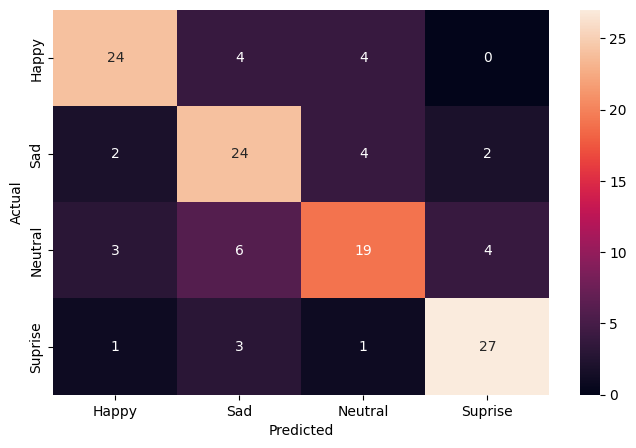

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
labels = ['Happy', 'Sad', 'Neutral', 'Suprise']

pred = model_2_CNN.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Print Report
print(classification_report(y_true, pred))

# Confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
- Complex model CNN gives about 71% accuracy on the test data, comparable to the validation data's accuracy. This implies that the model gives a generalized performance and presents a moderate accuracy.
- The recall has a moderate range, which implies that the model is average at identifying emotions with a success of 68%.
- The model precision is moderately high; it can recognize happy and surprised emotions due to the predominant characteristics such as a smiling mouth when happy or the presence of hands and an open mouth when the person is surprised. Instead, sad and neutral emotions have a lower precision, around 50% of success on the test data.
- Sad and Neutral emotions are difficult to predict due it share similarities in the facial features of each emotion.
- The highest emotions the model recognizes are happiness and surprise, while the lowest is sad.
- We can appreciate that the tunning in the different layers of model 2 helps to improve accuracy and reduce overfitting on training data. However, the large number of layers reduces the test accuracy if we compare the model with previous convolutional models.  

## **Conclusion:**
- Convolutional Neural Networks perform better in recognizing emotions from images after training. Overall, the second convolution model presents the best performance, having a value of ~78%.
- The model with the lower performance is the Artificial Neural Network, which has an accuracy of 43%.
- Convolutional models present overfitting; this includes the learning architectures we use in the Artificial Neural Network model.
- Adding learning architecture into our base model (ANN) improves the model's performance, giving the EfficientNet architecture the best result with 78% accuracy on test data. VGG16 and ResNet present 56% and 62% accuracy, respectively. There is room for performance improvement using learning architectures by adding complex layers and tuning hyper-parameters.
- The complex Neural Network model presents a higher structure than other models. However, the performance did not surpass the second convolutional model we built previously. The model reduces overfitting by adding Dropout, MaxPooling, and BatchNormaliation layers on each convolutional block, but the overall performance decreases regarding test data.
- Sad and Neutral emotions have lower precision; this could be because emotional images from these two classes share facial expressions that are difficult for the model to predict.
- Happy and Surprised classes have the highest accuracy due to facial expressions that are dominant in the images, such as a smiling mouth when a person is happy or an open mouth and the presence of hands when the person is surprised.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
Meaningful insights from the data are the image quality to train models, patterns in the different classes, and facial expressions that are predominant between classes and regions of the face that contribute the most to emotion detection, such us, mouth, cheeks, and eyes.
### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
The performance depends on the model's complexity. Convolutional models show a better performance overall on greyscale images. However, using transfer learning architectures helps improve the performance of the artificial neural network. There is room for improvement on the models by adding the correct layers to reduce overfitting and tuning parameters to find the best configuration for this scenario.
### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
EfficientNet architecture significantly improves the performance of the ANN model. The complex neural network model presents a high block structure configuration where the performance got decreased in relation to the second iteration of the convolutional model. For this reason, I recommend the EfficientNet model, where we can play with the parameters to find the best performance for facial emotion recognition.

In [75]:
import tensorflow as tf
print("TF version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("Physical GPUs:", gpus)
print("GPU device name:", tf.test.gpu_device_name() if gpus else "No GPU")
# Run a tiny op and show its device
a = tf.constant([1.0])
b = tf.constant([2.0])
c = a + b
print("Result device:", c.device)

TF version: 2.20.0
Physical GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU device name: /device:GPU:0
Result device: /job:localhost/replica:0/task:0/device:GPU:0


I0000 00:00:1767009385.154181   28239 gpu_device.cc:2020] Created device /device:GPU:0 with 5518 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
